🎵 Generating music dataset...
Dataset shape: (1000, 6)

First few rows:
        tempo    energy  spectral_centroid  zero_crossing_rate  mfcc_mean  \
0  127.450712  0.919598        2430.867849            0.159866 -11.707669   
1  116.487946  0.717425        2639.520646            0.170807  50.525764   
2  112.957884  0.754547        2771.280022            0.118340  12.098114   
3   91.300796  0.829584        2908.222540            0.113949 -76.193800   
4  106.379639  0.836821        1793.848149            0.178518   3.376410   

  genre  
0  Rock  
1  Rock  
2  Rock  
3  Rock  
4  Rock  

Genre distribution:
genre
Rock          200
Jazz          200
Classical     200
Hip-Hop       200
Electronic    200
Name: count, dtype: int64


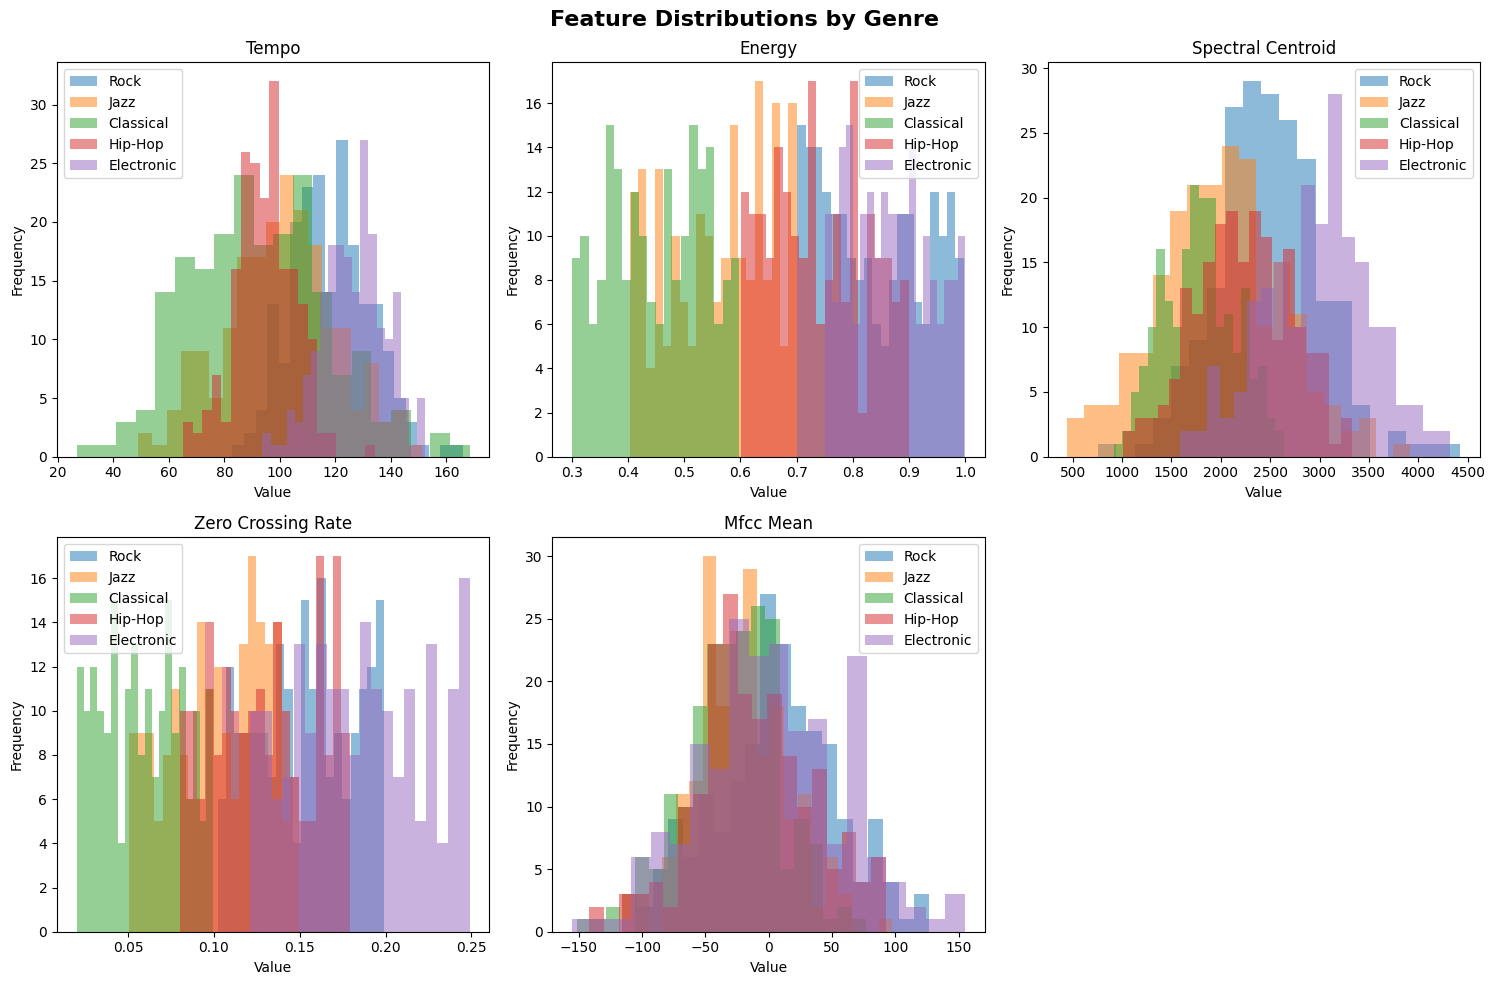


🔧 Preparing data for training...
Training set size: 800
Test set size: 200

🌲 Training Random Forest model...

✅ Model Accuracy: 80.50%

📊 Classification Report:
              precision    recall  f1-score   support

   Classical       0.82      0.93      0.87        40
  Electronic       0.81      0.75      0.78        40
     Hip-Hop       0.87      0.82      0.85        40
        Jazz       0.77      0.75      0.76        40
        Rock       0.76      0.78      0.77        40

    accuracy                           0.81       200
   macro avg       0.81      0.81      0.80       200
weighted avg       0.81      0.81      0.80       200



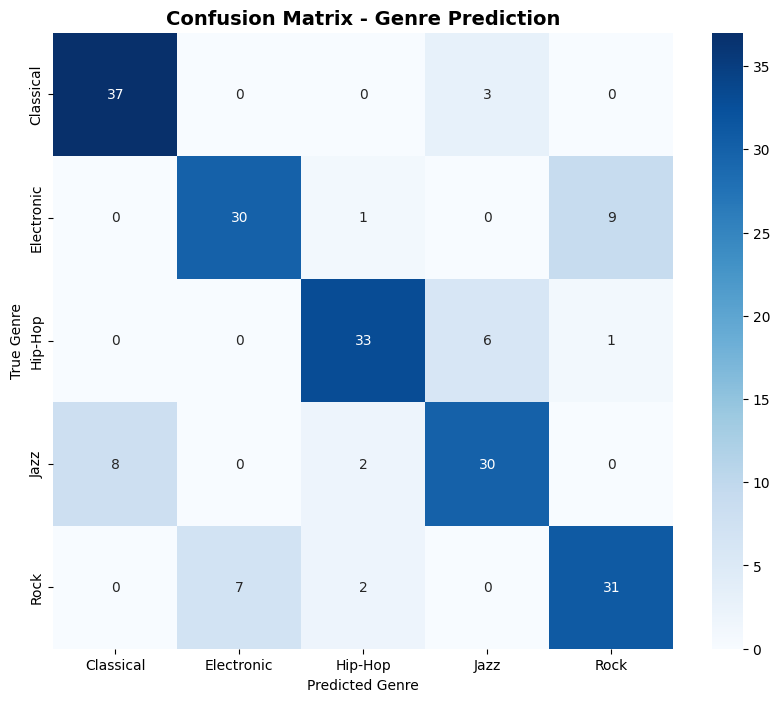

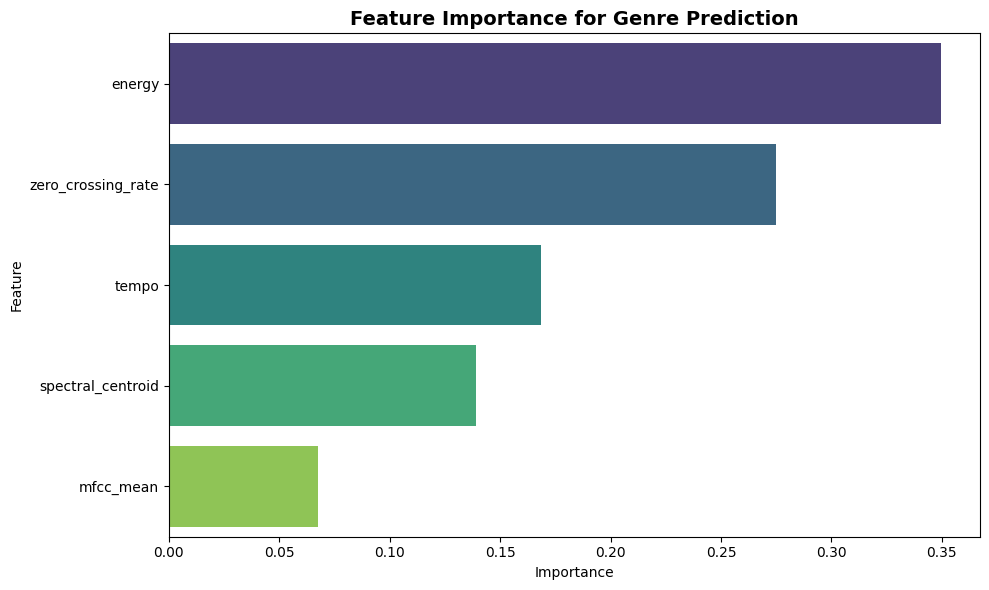


🎯 Feature Importance:
              feature  importance
1              energy    0.349775
3  zero_crossing_rate    0.274836
0               tempo    0.168696
2   spectral_centroid    0.139110
4           mfcc_mean    0.067584

SAMPLE PREDICTIONS

1️⃣ Sample 1: High energy, fast tempo (Rock-like)

🎵 Predicted Genre: Rock

📈 Prediction Probabilities:
  Classical: 0.00%
  Electronic: 47.64%
  Hip-Hop: 1.22%
  Jazz: 0.00%
  Rock: 51.13%

2️⃣ Sample 2: Moderate tempo, lower energy (Jazz-like)

🎵 Predicted Genre: Classical

📈 Prediction Probabilities:
  Classical: 65.67%
  Electronic: 0.00%
  Hip-Hop: 1.20%
  Jazz: 33.13%
  Rock: 0.00%

3️⃣ Sample 3: Very fast, high energy (Electronic-like)

🎵 Predicted Genre: Electronic

📈 Prediction Probabilities:
  Classical: 0.00%
  Electronic: 98.35%
  Hip-Hop: 0.00%
  Jazz: 0.00%
  Rock: 1.65%

✨ Music Genre Prediction System Complete!


In [1]:

!pip install librosa scikit-learn numpy pandas matplotlib seaborn

import numpy as np
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings
warnings.filterwarnings('ignore')

def generate_music_features(n_samples=1000):
    """Generate synthetic music features for different genres"""
    np.random.seed(42)

    genres = ['Rock', 'Jazz', 'Classical', 'Hip-Hop', 'Electronic']
    data = []

    for genre in genres:
        for _ in range(n_samples // len(genres)):
            if genre == 'Rock':
                tempo = np.random.normal(120, 15)
                energy = np.random.uniform(0.7, 1.0)
                spectral_centroid = np.random.normal(2500, 500)
                zcr = np.random.uniform(0.1, 0.2)
                mfcc_mean = np.random.normal(0, 50)

            elif genre == 'Jazz':
                tempo = np.random.normal(100, 20)
                energy = np.random.uniform(0.4, 0.7)
                spectral_centroid = np.random.normal(2000, 600)
                zcr = np.random.uniform(0.05, 0.15)
                mfcc_mean = np.random.normal(-20, 40)

            elif genre == 'Classical':
                tempo = np.random.normal(90, 25)
                energy = np.random.uniform(0.3, 0.6)
                spectral_centroid = np.random.normal(1800, 400)
                zcr = np.random.uniform(0.02, 0.1)
                mfcc_mean = np.random.normal(-30, 35)

            elif genre == 'Hip-Hop':
                tempo = np.random.normal(95, 10)
                energy = np.random.uniform(0.6, 0.9)
                spectral_centroid = np.random.normal(2200, 450)
                zcr = np.random.uniform(0.08, 0.18)
                mfcc_mean = np.random.normal(-10, 45)

            else:  # Electronic
                tempo = np.random.normal(128, 12)
                energy = np.random.uniform(0.75, 1.0)
                spectral_centroid = np.random.normal(3000, 600)
                zcr = np.random.uniform(0.12, 0.25)
                mfcc_mean = np.random.normal(10, 55)

            data.append({
                'tempo': tempo,
                'energy': energy,
                'spectral_centroid': spectral_centroid,
                'zero_crossing_rate': zcr,
                'mfcc_mean': mfcc_mean,
                'genre': genre
            })

    return pd.DataFrame(data)


print("🎵 Generating music dataset...")
df = generate_music_features(1000)
print(f"Dataset shape: {df.shape}")
print("\nFirst few rows:")
print(df.head())
print("\nGenre distribution:")
print(df['genre'].value_counts())

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
fig.suptitle('Feature Distributions by Genre', fontsize=16, fontweight='bold')

features = ['tempo', 'energy', 'spectral_centroid', 'zero_crossing_rate', 'mfcc_mean']
for idx, feature in enumerate(features):
    ax = axes[idx // 3, idx % 3]
    for genre in df['genre'].unique():
        data = df[df['genre'] == genre][feature]
        ax.hist(data, alpha=0.5, label=genre, bins=20)
    ax.set_title(feature.replace('_', ' ').title())
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    ax.legend()

axes[1, 2].axis('off')
plt.tight_layout()
plt.show()

print("\n🔧 Preparing data for training...")
X = df.drop('genre', axis=1)
y = df['genre']

le = LabelEncoder()
y_encoded = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training set size: {len(X_train)}")
print(f"Test set size: {len(X_test)}")

# Train Random Forest Classifier
print("\n🌲 Training Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = rf_model.predict(X_test_scaled)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"\n✅ Model Accuracy: {accuracy:.2%}")

print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred, target_names=le.classes_))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title('Confusion Matrix - Genre Prediction', fontsize=14, fontweight='bold')
plt.ylabel('True Genre')
plt.xlabel('Predicted Genre')
plt.show()

# Feature Importance
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': rf_model.feature_importances_
}).sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='importance', y='feature', palette='viridis')
plt.title('Feature Importance for Genre Prediction', fontsize=14, fontweight='bold')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

print("\n🎯 Feature Importance:")
print(feature_importance)

# Prediction function
def predict_genre(tempo, energy, spectral_centroid, zcr, mfcc_mean):
    """Predict genre for new audio features"""
    features = np.array([[tempo, energy, spectral_centroid, zcr, mfcc_mean]])
    features_scaled = scaler.transform(features)
    prediction = rf_model.predict(features_scaled)
    probabilities = rf_model.predict_proba(features_scaled)[0]

    genre = le.inverse_transform(prediction)[0]

    print(f"\n🎵 Predicted Genre: {genre}")
    print("\n📈 Prediction Probabilities:")
    for i, prob in enumerate(probabilities):
        print(f"  {le.classes_[i]}: {prob:.2%}")

    return genre

# Test with sample predictions
print("\n" + "="*60)
print("SAMPLE PREDICTIONS")
print("="*60)

print("\n1️⃣ Sample 1: High energy, fast tempo (Rock-like)")
predict_genre(tempo=125, energy=0.85, spectral_centroid=2600, zcr=0.15, mfcc_mean=5)

print("\n2️⃣ Sample 2: Moderate tempo, lower energy (Jazz-like)")
predict_genre(tempo=105, energy=0.55, spectral_centroid=2100, zcr=0.09, mfcc_mean=-15)

print("\n3️⃣ Sample 3: Very fast, high energy (Electronic-like)")
predict_genre(tempo=130, energy=0.92, spectral_centroid=3100, zcr=0.20, mfcc_mean=15)

print("\n" + "="*60)
print("✨ Music Genre Prediction System Complete!")
print("="*60)